<a href="https://colab.research.google.com/github/dominikadabrowska33/Obesity-or-CVD-risk-Classify-Regressor-Cluster-/blob/main/Multi_Class_Prediction_models_of_Obesity_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Obesity or CVD risk (Classify/Regressor/Cluster)**

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records. The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS) variables obtained : Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5 •Normal 18.5 to 24.9 •Overweight 25.0 to 29.9 •Obesity I 30.0 to 34.9 •Obesity II 35.0 to 39.9 •Obesity III Higher than 40



In [64]:
## REQUIRED LIBRARIES
# For data wrangling
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Read the data frame
from google.colab import drive
!git clone https://github.com/dominikadabrowska33/Obesity-or-CVD-risk-Classify-Regressor-Cluster-

fatal: destination path 'Obesity-or-CVD-risk-Classify-Regressor-Cluster-' already exists and is not an empty directory.


In [66]:
obesity = pd.read_csv(f'Obesity-or-CVD-risk-Classify-Regressor-Cluster-/ObesityDataSet.csv')
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [67]:
obesity['class'] = obesity['NObeyesdad'].astype('category').cat.codes #Encoding categories of class column into numerical values
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,class
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,5
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,6


In [68]:
# Creation of class map
obesity_class_map = obesity[['NObeyesdad', 'class']]
obesity_class_map = obesity_class_map.drop_duplicates()

obesity_class_map

,NObeyesdad,class
0,Normal_Weight,1
3,Overweight_Level_I,5
4,Overweight_Level_II,6
10,Obesity_Type_I,2
59,Insufficient_Weight,0
68,Obesity_Type_II,3
202,Obesity_Type_III,4


In [69]:
obesity_classes = obesity.pop('NObeyesdad') #removal of 'NObeyesdad' column
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,class
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,5
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,6


In [70]:
# Get unique count for each variable
obesity.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
class                                7
dtype: int64

In [71]:
# Check variable data types
obesity.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
class                                int8
dtype: object

One-Hot encoding for categorical columns

In [72]:
# Splitting the dataframe into numerical and categorical columns
obesity_object = obesity.select_dtypes(include='object')
obesity_numeric = obesity.select_dtypes(exclude='object')

# One-hot encoding
obesity_object_dummies = pd.get_dummies(obesity_object, drop_first= True, dtype=int)

# Concatenation of both data frames
obesity = pd.concat([obesity_numeric, obesity_object_dummies], axis=1)
obesity.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,class,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5,1,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,6,1,...,0,0,0,0,1,0,0,0,1,0


In [73]:
# Check columns list and missing values
obesity.isnull().sum()

Age                                   0
Height                                0
Weight                                0
FCVC                                  0
NCP                                   0
CH2O                                  0
FAF                                   0
TUE                                   0
class                                 0
Gender_Male                           0
family_history_with_overweight_yes    0
FAVC_yes                              0
CAEC_Frequently                       0
CAEC_Sometimes                        0
CAEC_no                               0
SMOKE_yes                             0
SCC_yes                               0
CALC_Frequently                       0
CALC_Sometimes                        0
CALC_no                               0
MTRANS_Bike                           0
MTRANS_Motorbike                      0
MTRANS_Public_Transportation          0
MTRANS_Walking                        0
dtype: int64

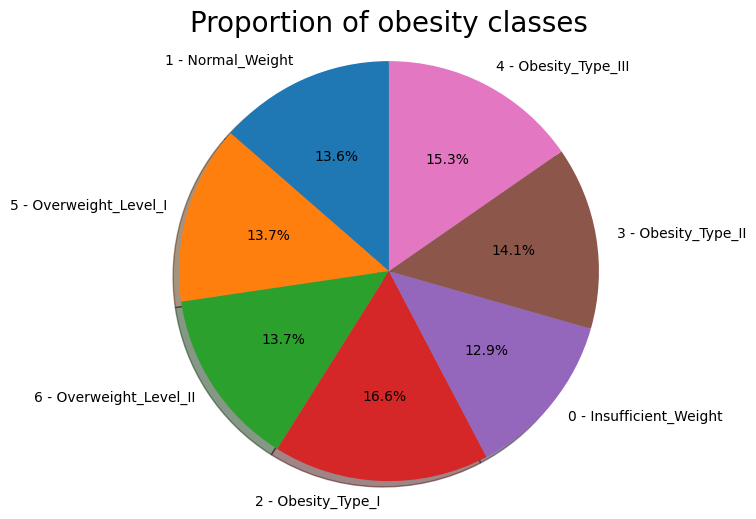

In [74]:
# Check propotion of obesity class
labels = '1 - Normal_Weight', '5 - Overweight_Level_I', '6 - Overweight_Level_II', '2 - Obesity_Type_I', '0 - Insufficient_Weight', '3 - Obesity_Type_II', '4 - Obesity_Type_III'
sizes = [obesity['class'][obesity['class']==1].count(), obesity['class'][obesity['class']==5].count(),
         obesity['class'][obesity['class']==6].count(), obesity['class'][obesity['class']==2].count(),
         obesity['class'][obesity['class']==0].count(), obesity['class'][obesity['class']==3].count(),
         obesity['class'][obesity['class']==4].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of obesity classes", size = 20)
plt.show()

Text(0.5, 1.0, 'Correlation matrix')

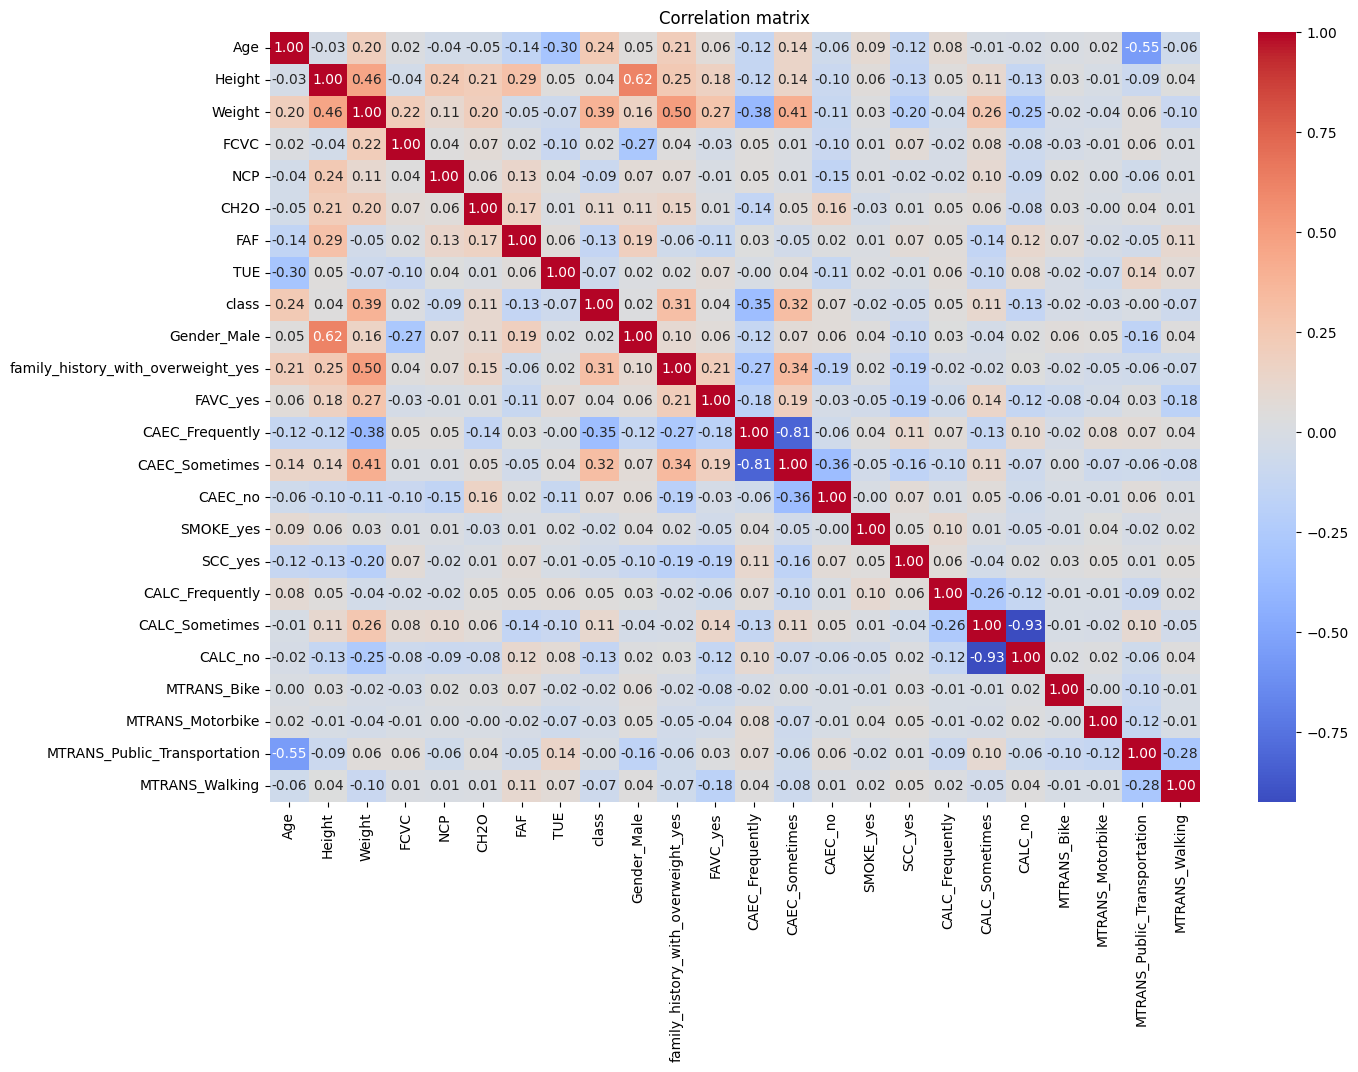

In [12]:
# Calculating the correlation matrix
correlation_matrix = obesity.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')

In [13]:
# Checking basic descriptive statistics
obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,class,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,3.015632,0.505921,...,0.024159,0.020843,0.045476,0.033160,0.663667,0.302700,0.003316,0.005211,0.748460,0.026528
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,1.952090,0.500083,...,0.153580,0.142893,0.208395,0.179096,0.472566,0.459535,0.057502,0.072015,0.434001,0.160737
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Preprocessing

In [14]:
y = obesity.pop('class')
x = obesity

x.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0,1,...,0,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [15]:
y.head()

0    1
1    1
2    1
3    5
4    6
Name: class, dtype: int8

Import - Standard Scaler

In [16]:
# Data scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_sc = sc.fit_transform(x)

print(x_sc)

[[-0.52212439 -0.87558934 -0.86255819 ... -0.07237469  0.57972058
  -0.16507758]
 [-0.52212439 -1.94759928 -1.16807699 ... -0.07237469  0.57972058
  -0.16507758]
 [-0.20688898  1.05402854 -0.36609013 ... -0.07237469  0.57972058
  -0.16507758]
 ...
 [-0.28190933  0.54167211  1.79886776 ... -0.07237469  0.57972058
  -0.16507758]
 [ 0.00777624  0.40492652  1.78577968 ... -0.07237469  0.57972058
  -0.16507758]
 [-0.10211908  0.39834438  1.7905916  ... -0.07237469  0.57972058
  -0.16507758]]


# Import - PCA - Scaler
There are few correlations, so I will try using the PCA method to reduce the number of components.

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_sc)

In [18]:
pca_new = PCA(n_components=12)
x_new = pca_new.fit_transform(x_sc)

print(x_new)

[[ 1.69804082  0.80073997 -1.49257328 ...  0.0515349  -0.28242328
   0.09387275]
 [ 1.852835   -0.98813581  1.23380971 ...  2.41757485 -4.31374325
  -1.16370795]
 [ 0.31204335  2.40910131  1.56338076 ... -1.14008725  2.13953644
  -1.24968886]
 ...
 [-1.71337785 -1.1854823   0.31619446 ... -0.03511237 -0.04672149
   0.11400196]
 [-1.90039312 -1.21396922  0.36520898 ... -0.03721806  0.24633144
   0.4469333 ]
 [-1.8828533  -1.24905124  0.38926968 ... -0.00573042  0.28588383
   0.56643778]]


# Logistic Regression with PCA

In [19]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_new,y,test_size=0.3, random_state = 42, stratify = y)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the logistic regression classifier
clf = LogisticRegression(max_iter=10000)

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid to the data
grid_search.fit(X_train_pca, y_train_pca)

# Display the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_pca)

# Calculate accuracy score
accuracy = accuracy_score(y_test_pca, y_pred)
print("Accuracy: ", accuracy)

Best parameters found:  {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy:  0.6246056782334385


In [22]:
# Calculation of the confusion matrix for the test data and the predictions made by the logistic regression model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(y_test_pca, y_pred))

[[48 18  0  0  0  6 10]
 [23 35  6  0  0 16  6]
 [ 3  2 64 11  0  3 23]
 [ 0  1  1 84  0  2  1]
 [ 0  0  1  0 96  0  0]
 [ 4 12 13  0  0 50  8]
 [ 9  4 41  3  0 11 19]]


In [23]:
# Classification report
target_names = ['0','1','2','3','4','5','6']
print(classification_report(y_test_pca, y_pred.reshape(-1,1), target_names=target_names))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57        82
           1       0.49      0.41      0.44        86
           2       0.51      0.60      0.55       106
           3       0.86      0.94      0.90        89
           4       1.00      0.99      0.99        97
           5       0.57      0.57      0.57        87
           6       0.28      0.22      0.25        87

    accuracy                           0.62       634
   macro avg       0.61      0.62      0.61       634
weighted avg       0.61      0.62      0.62       634



In [24]:
print("Accuracy: ",accuracy_score(y_test_pca,y_pred))

Accuracy:  0.6246056782334385


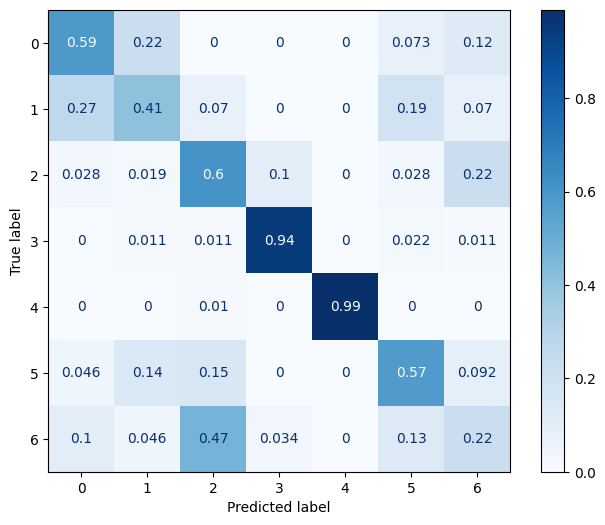

In [25]:
# Confusion matrix
lr_cm_pca = confusion_matrix(y_test_pca, y_pred.reshape(-1,1), normalize='true')
lr_disp_pca = ConfusionMatrixDisplay(confusion_matrix=lr_cm_pca, display_labels=target_names)
lr_fig_pca, lr_ax_pca = plt.subplots(figsize=(8,6))
lr_disp_pca.plot(ax=lr_ax_pca,cmap='Blues')

# Logistic Regression - without PCA
Let's try the same method without PCA.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_sc, y,test_size=0.3, random_state = 42, stratify = y)

In [28]:
from sklearn.model_selection import GridSearchCV
# Define the logistic regression classifier
clf = LogisticRegression(max_iter=10000)

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid to the data
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Best parameters found:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Accuracy:  0.9337539432176656


In [29]:
# Classification report
target_names = ['0','1','2','3','4','5','6']
print(classification_report(y_test, y_pred.reshape(-1,1), target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        82
           1       0.88      0.88      0.88        86
           2       0.97      0.90      0.93       106
           3       0.96      0.98      0.97        89
           4       0.99      0.99      0.99        97
           5       0.87      0.86      0.87        87
           6       0.89      0.93      0.91        87

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



Accuracy improves without PCA, but we have two classes with a class proportion under 14% that exhibit slightly worse F1-scores compared to other classes. I will use the SMOTE method to upsample the minority classes and see if this gives me better results.

In [30]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

from sklearn.model_selection import GridSearchCV
# Define the logistic regression classifier
clf = LogisticRegression(max_iter=10000)

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid to the data
grid_search.fit(X_resampled, y_resampled)

# Display the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Best parameters found:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Accuracy:  0.9337539432176656


In [31]:
# Classification report
target_names = ['0','1','2','3','4','5','6']
print(classification_report(y_test, y_pred.reshape(-1,1), target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        82
           1       0.88      0.88      0.88        86
           2       0.97      0.90      0.93       106
           3       0.96      0.98      0.97        89
           4       0.99      0.99      0.99        97
           5       0.87      0.86      0.87        87
           6       0.89      0.93      0.91        87

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



I don't observe any significant improvements after applying the SMOTE method. Let's see if other models provide better results. I will create a function that performs grid search cross-validation to optimize hyperparameters for a given model, evaluates its performance using accuracy, shows classification report and displays the confusion matrix plot. Then I will use to check other models.

In [56]:
def model(model, params, X_train, X_test, y_train, y_test):
    # Perform grid search cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best model and best parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Calculate training and testing scores
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    # Calculate accuracy on test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print("best_params:", best_params, "\n")
    print(classification_report(y_test, y_pred.reshape(-1,1), target_names=target_names), "\n")
    # Confusion matrix
    dt_cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
    dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=target_names)
    dt_fig, dt_ax = plt.subplots(figsize=(8,6))
    dt_disp.plot(ax=dt_ax,cmap='Blues')


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sc,y,test_size=0.3,random_state=42)


# Decision Tree

best_params: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2} 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        86
           1       0.95      0.82      0.88        93
           2       0.97      0.96      0.97       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.86      0.94      0.90        88
           6       0.94      0.94      0.94        79

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.95      0.94      0.94       634
 



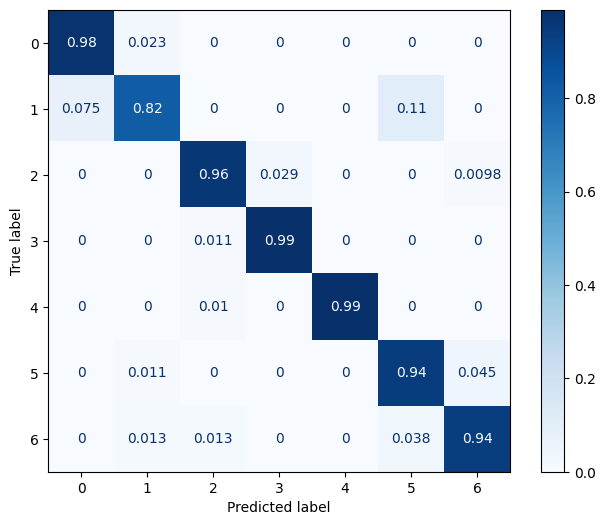

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model(dtree, param_grid, X_train, X_test, y_train, y_test)

The Decision Tree method yielded better results than Logistic Regression. However, let's also explore other methods.

# Random Forest Classifier

best_params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        86
           1       0.76      0.90      0.82        93
           2       0.99      0.94      0.96       102
           3       0.98      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.94      0.83      0.88        88
           6       0.94      0.92      0.93        79

    accuracy                           0.93       634
   macro avg       0.94      0.93      0.93       634
weighted avg       0.94      0.93      0.93       634
 



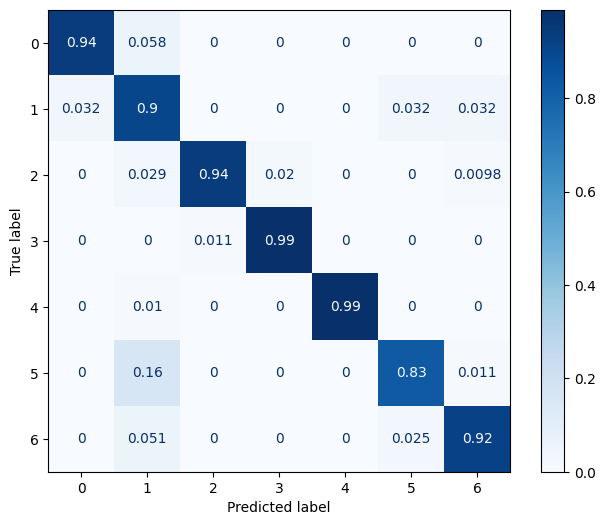

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForest classifier
clf = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model(clf, param_grid, X_train, X_test, y_train, y_test)

# SVC (Support Vector Classifier)

best_params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'} 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        86
           1       0.96      0.92      0.94        93
           2       0.98      0.96      0.97       102
           3       0.97      1.00      0.98        88
           4       1.00      0.99      0.99        98
           5       0.92      0.98      0.95        88
           6       0.96      0.92      0.94        79

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634
 



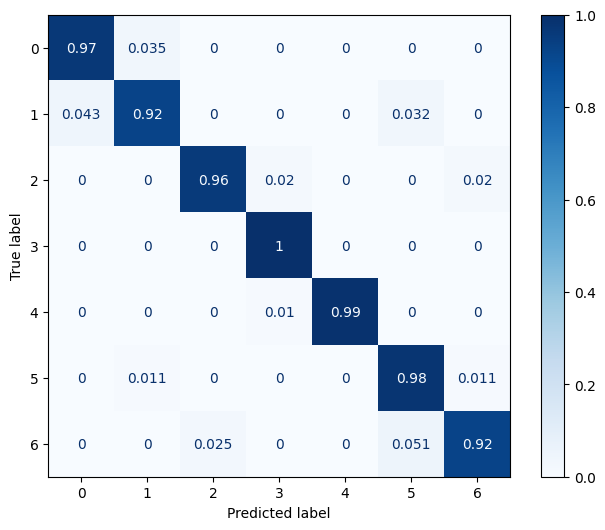

In [60]:
from sklearn.svm import SVC

# Define the SVC classifier
clf = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

model(clf, param_grid, X_train, X_test, y_train, y_test)

# XGB Classifier

best_params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8} 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        86
           1       0.91      0.89      0.90        93
           2       0.96      0.96      0.96       102
           3       0.99      0.99      0.99        88
           4       1.00      0.99      0.99        98
           5       0.87      0.93      0.90        88
           6       1.00      0.94      0.97        79

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634
 



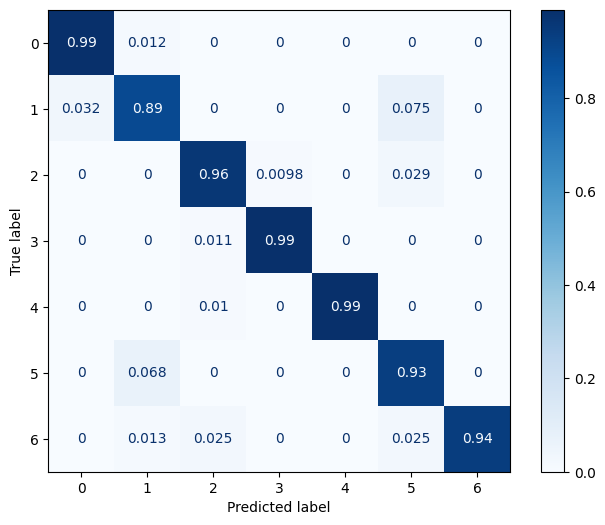

In [61]:
from xgboost import XGBClassifier

# Define the XGBClassifier
clf = XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

model(clf, param_grid, X_train, X_test, y_train, y_test)

# KNeighbors Classifier

best_params: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        86
           1       0.73      0.61      0.67        93
           2       0.85      0.88      0.87       102
           3       0.91      0.98      0.95        88
           4       0.98      0.99      0.98        98
           5       0.81      0.78      0.80        88
           6       0.82      0.81      0.82        79

    accuracy                           0.86       634
   macro avg       0.85      0.86      0.85       634
weighted avg       0.85      0.86      0.85       634
 



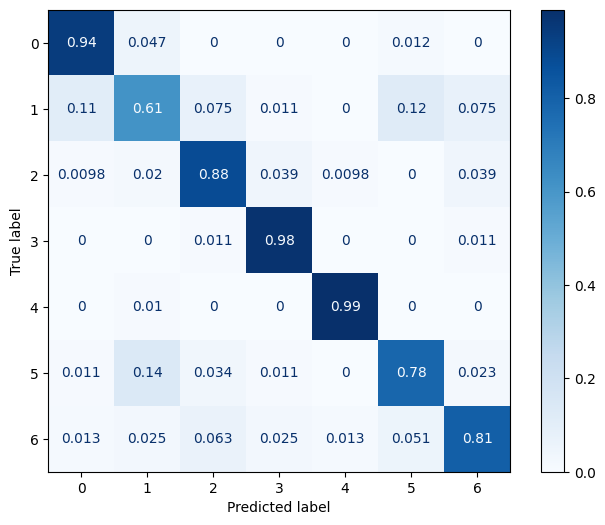

In [62]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

model(knn, param_grid, X_train, X_test, y_train, y_test)

Model accuracy comparison:

- LR with PCA - 0.62
- LR without PCA - 0.93
- LR without PCA with SMOTE - 0.93
- Decision Tree Classifier - 0.94
- Random Forest Classifier - 0.93
- SVC Classifier - 0.96
- XGB Classifier - 0.96
- KNeighbors Classifier - 0.86

